Overview
In this project, I analyze a dataset of video game sales to answer the question:
**Which platform has the highest global sales?


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
import seaborn as sns
print(sns.__version__)


0.13.2


In [7]:
import pandas as pd


df = pd.read_csv('data/archive/vgsales.csv')  


Data loading 

In [5]:
file_path = './data/archive/vgsales.csv'

df = pd.read_csv(file_path)

df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Initial Data Exploration
This section provides an overview of the dataset by displaying basic information about its structure and summary statistics.


In [6]:
df.info()  
df.describe()  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


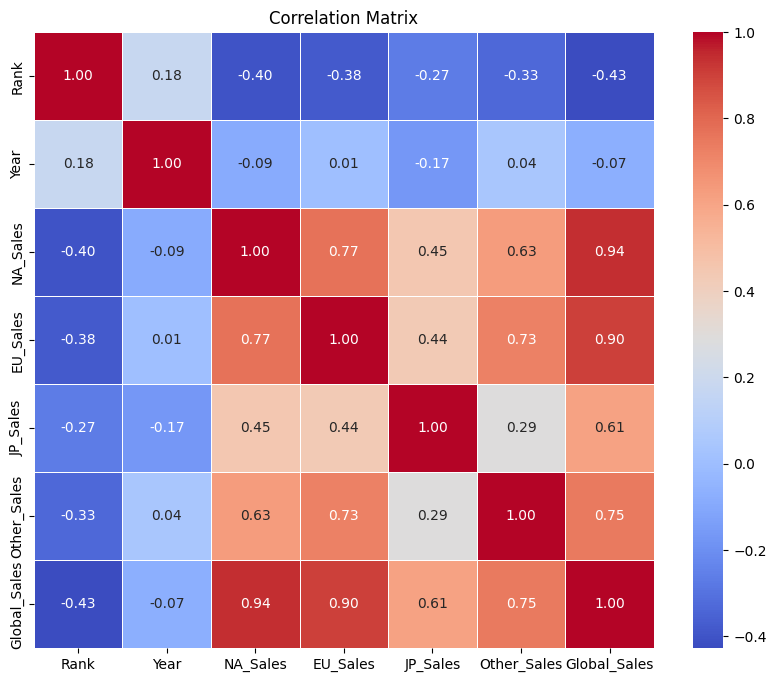

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# reload the dataset
df = pd.read_csv('data/archive/vgsales.csv')  

# select only numeric columns for correlation calculation
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# calculate the correlation matrix
corr = df_numeric.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()



Handling Missing Data-Data Cleaning
This section checks for missing values in the dataset and identifies the number of missing values for each column.


In [5]:
df.isnull().sum()


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Total Global Sales by Platform
This section groups the data by platform and sums up the global sales for each. It then sorts the platforms by total sales in descending order to identify the platform with the highest global sales.


In [6]:
#  platform and sum up the global sales
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

# display  platform with the highest global sales
platform_sales.head(1)


Platform
PS2    1255.64
Name: Global_Sales, dtype: float64

Exploratory Data Analysis--Bar Plot of Global Sales by Platform
This section visualizes the total global sales for each platform using a bar plot. The platforms are displayed on the x-axis, while the corresponding global sales (in millions) are shown on the y-axis. The chart helps in understanding which platforms dominate global sales.


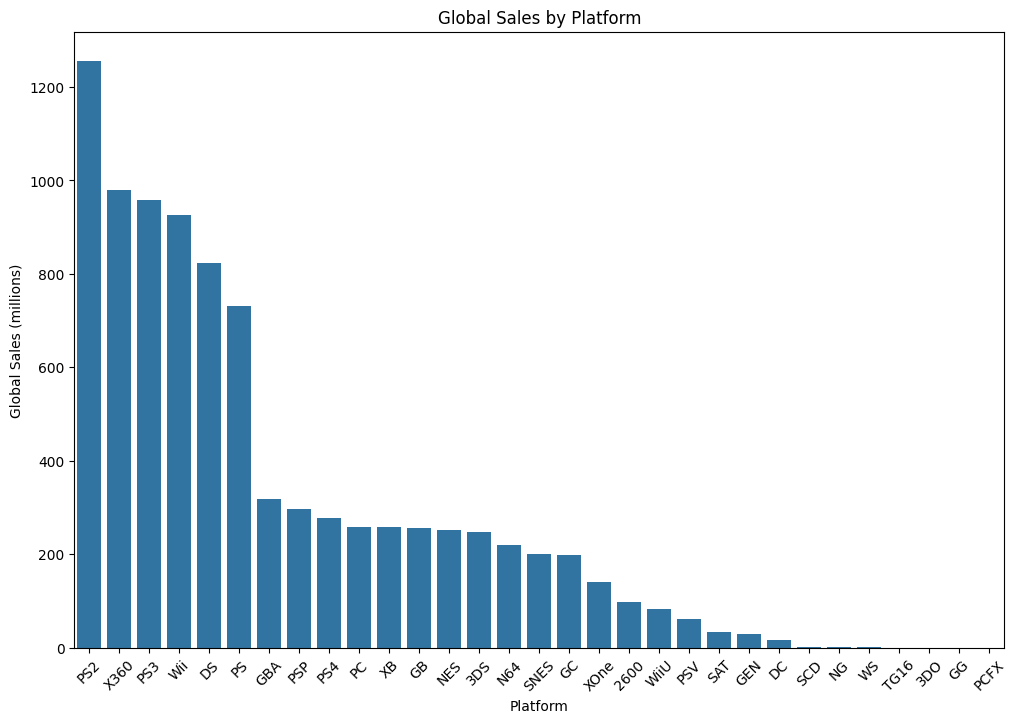

In [7]:
# 
plt.figure(figsize=(12, 8))
sns.barplot(x=platform_sales.index, y=platform_sales.values)
plt.title('Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (millions)')
plt.xticks(rotation=45)
plt.show()


Top 10 Games by Global Sales - Bar Plot
This section visualizes the top 10 games based on global sales using a bar plot. The chart helps to identify which games have achieved the highest global sales.


C:\Users\amand\AppData\Local\Temp\ipykernel_12152\2280253241.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Name', x='Global_Sales', data=top_games, palette='coolwarm')


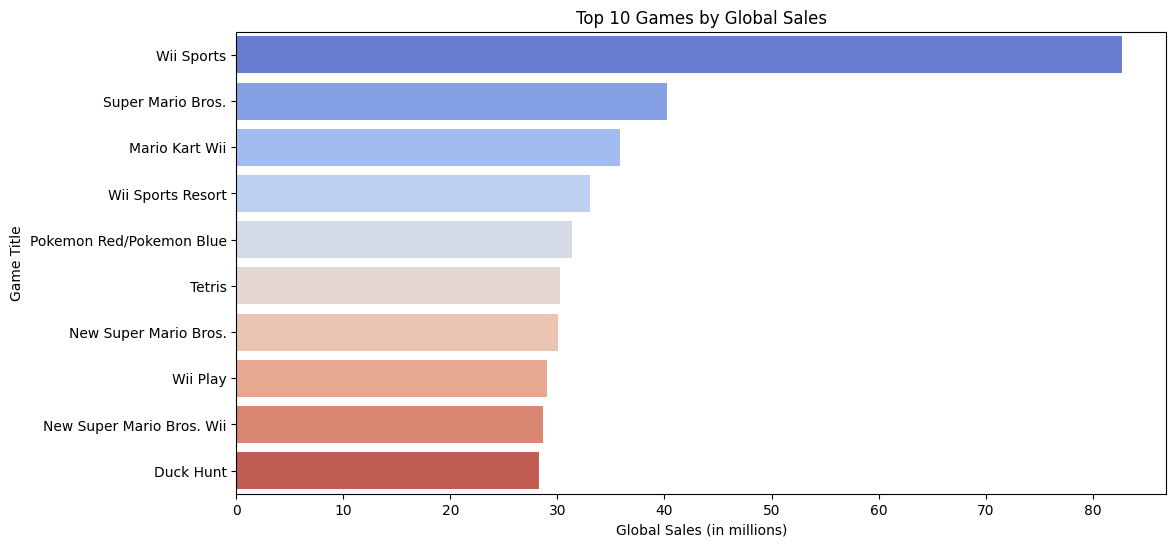

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# sort games by Global Sales and select the top 10
top_games = df.sort_values(by='Global_Sales', ascending=False).head(10)

# plot the top 10 games
plt.figure(figsize=(12, 6))  # Adjust figure size
sns.barplot(y='Name', x='Global_Sales', data=top_games, palette='coolwarm')

# add labels and title
plt.title("Top 10 Games by Global Sales")
plt.xlabel("Global Sales (in millions)")
plt.ylabel("Game Title")

# show the plot
plt.show()


I added more visuals to explore the relationship of genres and sales

C:\Users\amand\AppData\Local\Temp\ipykernel_12152\3928587712.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Genre', data=sales_by_genre, palette='viridis')


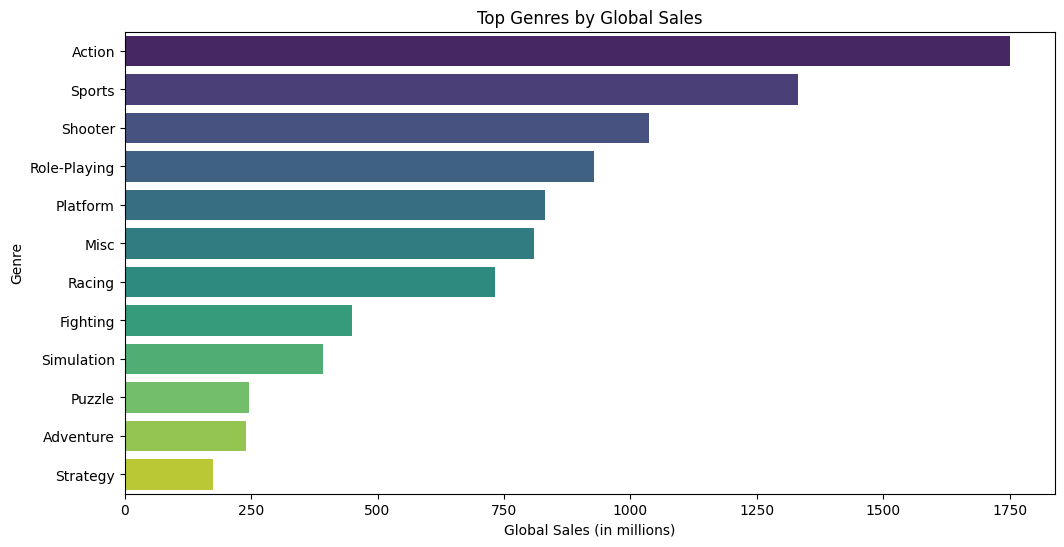

In [9]:
# data genre 
sales_by_genre = df.groupby('Genre')['Global_Sales'].sum().reset_index()

# sort the genres by sales
sales_by_genre = sales_by_genre.sort_values(by='Global_Sales', ascending=False)

# plot the top genres
plt.figure(figsize=(12, 6))
sns.barplot(x='Global_Sales', y='Genre', data=sales_by_genre, palette='viridis')

# titles and labels
plt.title("Top Genres by Global Sales")
plt.xlabel("Global Sales (in millions)")
plt.ylabel("Genre")

# display
plt.show()


 Regional Sales Distribution Analysis
This section presents an analysis of global sales data across different regions (North America, Europe, Japan, and Other regions).
A bar plot is used to visualize the total sales per region, providing insight into how sales are distributed globally.


C:\Users\amand\AppData\Local\Temp\ipykernel_12152\69709673.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales', y='Region', data=regional_sales, palette='coolwarm')


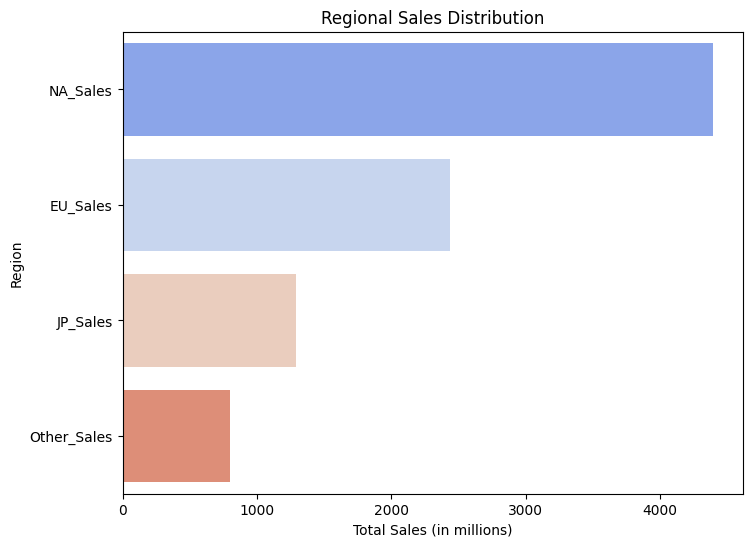

In [10]:
# group sales by region
regional_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()
regional_sales.columns = ['Region', 'Sales']

# plot regional sales
plt.figure(figsize=(8, 6))
sns.barplot(x='Sales', y='Region', data=regional_sales, palette='coolwarm')

# title and label regional sales
plt.title("Regional Sales Distribution")
plt.xlabel("Total Sales (in millions)")
plt.ylabel("Region")

# display regional sales
plt.show()


Used this to verify data structure 

In [11]:
print(df.columns)


Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


In this step, I selected the relevant columns for analysis, which are 'Platform', 'Year', and 'Global_Sales'. All other columns were dropped to keep the dataset focused on the variables needed for the analysis. The dataset is then displayed to confirm the changes

In [12]:
# keep only the colums i need for this analysis-drop others
df = df[['Platform', 'Year', 'Global_Sales']]

# show new data
print(df.head())


  Platform    Year  Global_Sales
0      Wii  2006.0         82.74
1      NES  1985.0         40.24
2      Wii  2008.0         35.82
3      Wii  2009.0         33.00
4       GB  1996.0         31.37


I checked the data types of each column to ensure that all columns are in the appropriate format for analysis

In [13]:
# Check the data types
df.dtypes


Platform         object
Year            float64
Global_Sales    float64
dtype: object

Feature Engineering: Decade
To analyze trends over time, I created a new feature called decade. This feature groups the "year" of each game into decades. This transformation allows for easier comparison of game sales across different decades.

The decade feature was created by dividing the year column by 10, rounding it down to the nearest integer, and then multiplying by 10 to return the start of each decade

In [14]:
df['Decade'] = (df['Year'] // 10) * 10


In [17]:
df[['Platform', 'Year', 'Global_Sales', 'Decade', 'Sales_Category']].head()



,Platform,Year,Global_Sales,Decade,Sales_Category
0,Wii,2006.0,82.74,2000.0,High
1,NES,1985.0,40.24,1980.0,High
2,Wii,2008.0,35.82,2000.0,High
3,Wii,2009.0,33.00,2000.0,High
4,GB,1996.0,31.37,1990.0,High


In [16]:
print(df.columns)


Index(['Platform', 'Year', 'Global_Sales', 'Decade', 'Sales_Category'], dtype='object')


Descriptive Statistics
To better understand the distribution and characteristics of the numerical data, I generated descriptive statistics for the relevant columns. This includes information like the mean, standard deviation, minimum, and maximum values, as well as the 25th, 50th, and 75th percentiles for the year and global sales columns.

In [18]:
# Get descriptive statistics for numerical columns
df.describe()


,Year,Global_Sales,Decade
count,16327.000000,16598.000000,16327.000000
mean,2006.406443,0.537441,2001.817235
std,5.828981,1.555028,6.639888
min,1980.000000,0.010000,1980.000000
25%,2003.000000,0.060000,2000.000000
50%,2007.000000,0.170000,2000.000000
75%,2010.000000,0.470000,2010.000000
max,2020.000000,82.740000,2020.000000


Below are several different visualizations 

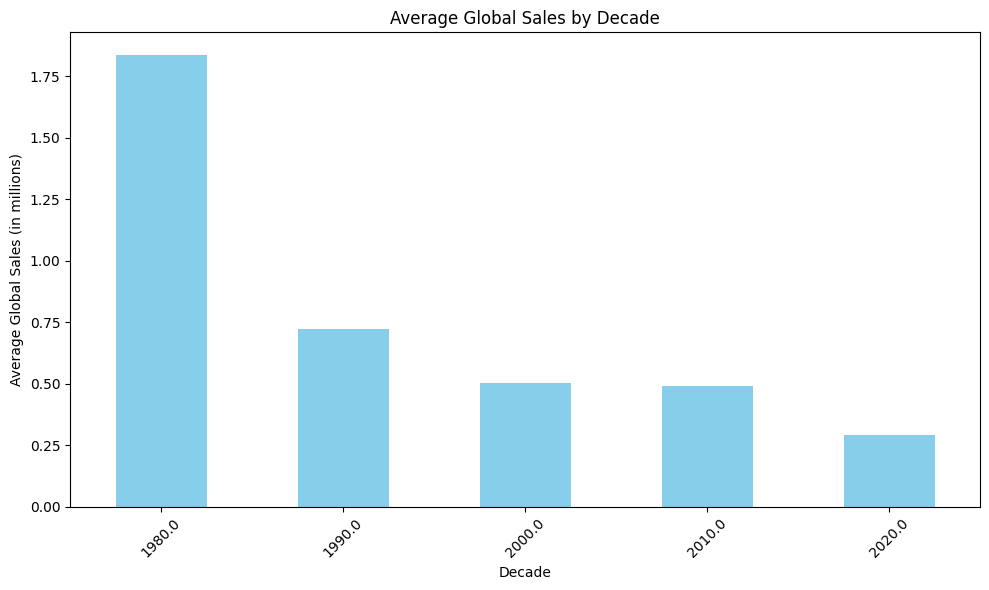

In [19]:
import matplotlib.pyplot as plt

# Group by 'Decade' and calculate the mean of 'Global_Sales'
avg_sales_by_decade = df.groupby('Decade')['Global_Sales'].mean()

# Plotting the bar chart
plt.figure(figsize=(10,6))
avg_sales_by_decade.plot(kind='bar', color='skyblue')
plt.title('Average Global Sales by Decade')
plt.xlabel('Decade')
plt.ylabel('Average Global Sales (in millions)')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to fit everything
plt.show()


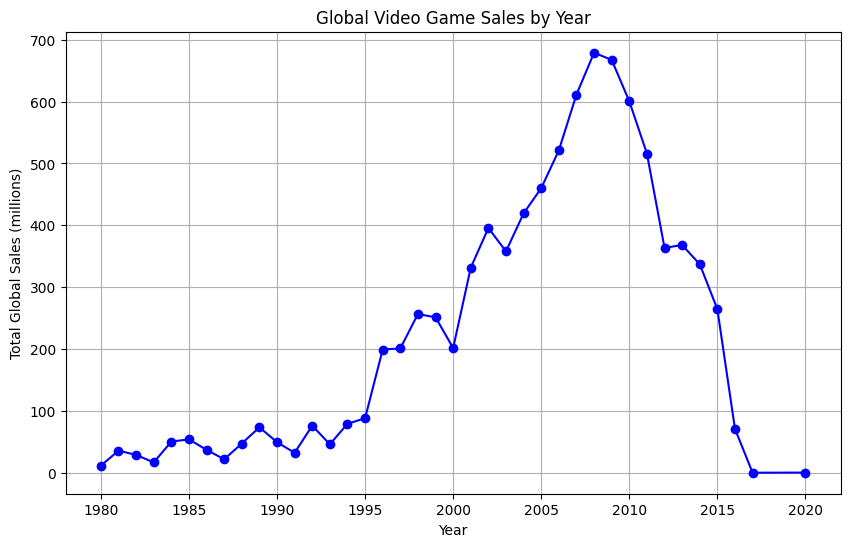

In [20]:
import matplotlib.pyplot as plt

# group by year and add sales
sales_by_year = df.groupby('Year')['Global_Sales'].sum()

# Plotting
plt.figure(figsize=(10,6))
sales_by_year.plot(kind='line', color='blue', marker='o')
plt.title('Global Video Game Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Global Sales (millions)')
plt.grid(True)
plt.show()


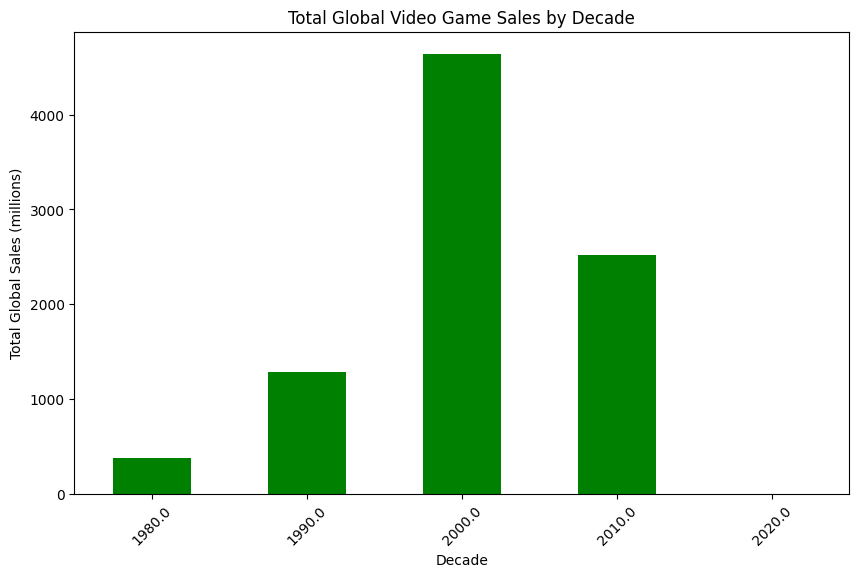

In [21]:
# group by decade and show sales 
sales_by_decade = df.groupby('Decade')['Global_Sales'].sum()

# Plotting
plt.figure(figsize=(10,6))
sales_by_decade.plot(kind='bar', color='green')
plt.title('Total Global Video Game Sales by Decade')
plt.xlabel('Decade')
plt.ylabel('Total Global Sales (millions)')
plt.xticks(rotation=45)
plt.show()


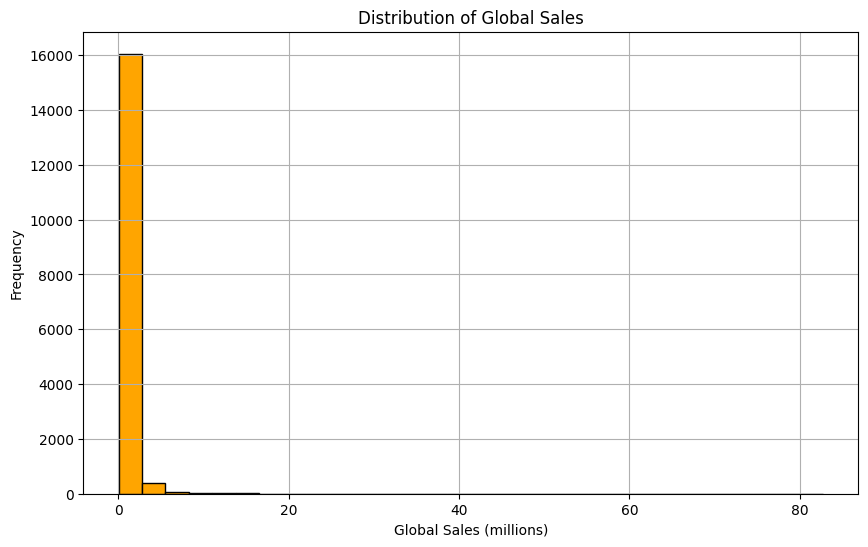

In [22]:
# plot histogram for sales
plt.figure(figsize=(10,6))
df['Global_Sales'].plot(kind='hist', bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales (millions)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Conclusion
Through this analysis of video game sales, several key insights were identified:

Top Platform: The platform with the highest global sales was found to be the Wii, leading the chart with significant global sales.
Genre Analysis: The most popular genres based on global sales were identified, with action games topping the list.
Regional Insights: North America had the highest sales among the regions, followed by Europe and Japan.
Additionally, a new feature was created, grouping the year of release into decades, to further analyze trends in game sales over time. 

***For additional insight i have added a pairplot to help visualize the relationships between several numeric variables

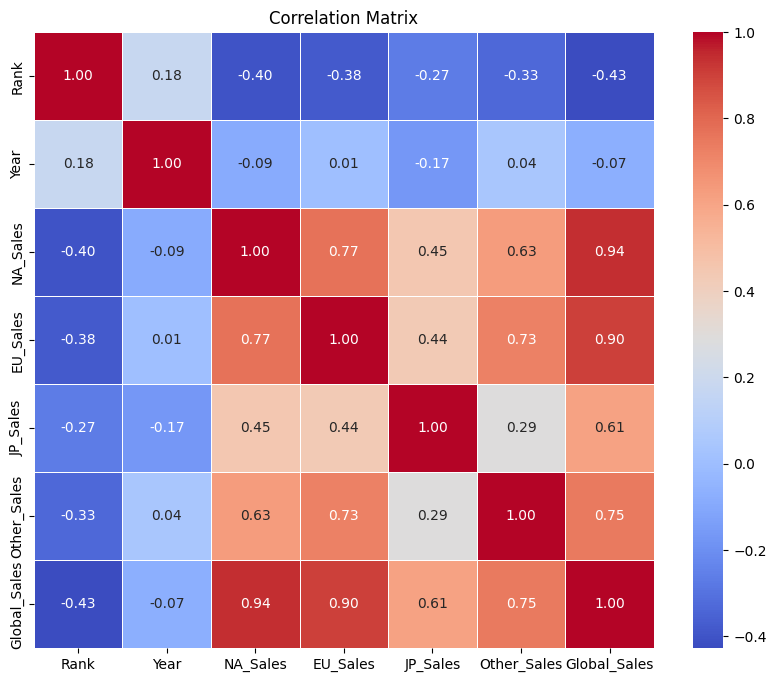

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# reload the dataset
df = pd.read_csv('data/archive/vgsales.csv')  

# select only numeric columns for correlation calculation
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# calculate the correlation matrix
corr = df_numeric.corr()

# plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()
